Copyright ©2022. Stephen Rigden.
This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.
This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with this program.  If not,
see <https://www.gnu.org/licenses/>.

# Plot Heart Rate

In [6]:
import pandas
from pathlib import Path
from matplotlib import pyplot
import seaborn

from heart_health.utilities import TimeBins


seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [7]:
project_path = Path.cwd().parent.parent
heart_df_pickle = project_path / 'data' / 'processed' / 'heart_preprocessed.pickle'
heart_rate_pdf = project_path / 'reports' / 'heart_rate.pdf'
heart_rate_jpg = project_path / 'reports' / 'heart_rate.jpg'

In [8]:
ds = pandas.read_pickle(heart_df_pickle)

heart_rate = ds['type'] == 'HKQuantityTypeIdentifierHeartRate'
ds = ds.loc[heart_rate, ['date', 'value']]
ds = ds.rename(columns={'value': 'heart rate'})

#### Review the data's structure

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20160 entries, 1344 to 21503
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        20160 non-null  datetime64[ns]
 1   heart rate  20160 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 472.5 KB


In [10]:
ds.head()

,date,heart rate
1344,1875-06-01 00:00:00,67.0
1345,1875-06-01 00:12:00,56.0
1346,1875-06-01 00:24:00,71.0
1347,1875-06-01 00:36:00,76.0
1348,1875-06-01 00:48:00,62.0


In [11]:
ds.date.max()

Timestamp('1875-11-15 23:48:00')

In [12]:
ds.date.min()

Timestamp('1875-06-01 00:00:00')

### Divide data into ten time buckets

In [13]:
start = ds.date.min()
end = ds.date.max()
period_of_interest = end - start
categories = TimeBins(start_date=start, end_date=end)
categories

TimeBins(start_date=Timestamp('1875-06-09 23:48:00'), end_date=Timestamp('1875-11-15 23:48:00'), bin_size=16, bin_count=10)

In [14]:
ds['bucket'] = ds['date'].apply(categories.get_bin)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20160 entries, 1344 to 21503
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        20160 non-null  datetime64[ns]
 1   heart rate  20160 non-null  float64       
 2   bucket      19081 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 630.0+ KB


### Box plot

[Text(0.5, 0, '16 Day Intervals. (last day shown)')]

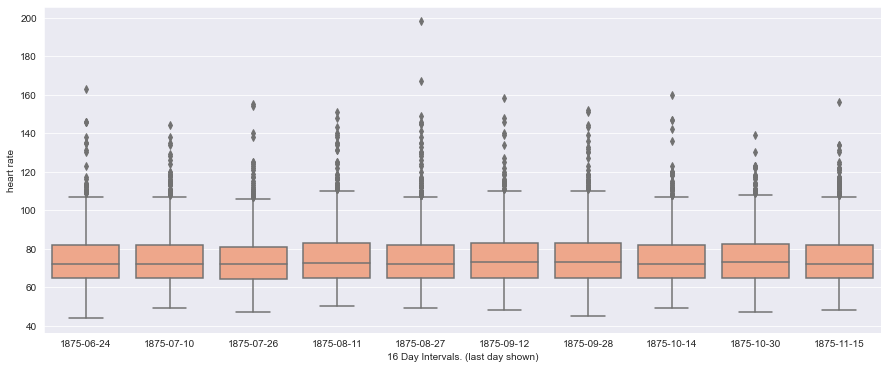

In [15]:
_, axes = pyplot.subplots(figsize=(15, 6))
seaborn.boxplot(data=ds,
                x='bucket', y='heart rate',
                ax=axes, palette=['lightsalmon'])
axes.set(xlabel=f"{categories.bin_size} Day Intervals. (last day shown)")

### Boxenplot

[Text(0.5, 0, '16 Day Intervals. (last day shown)')]

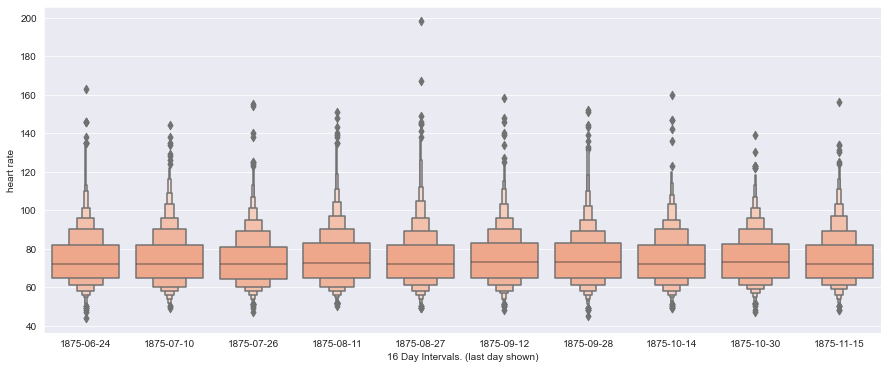

In [16]:
_, axes = pyplot.subplots(figsize=(15, 6))
seaborn.boxenplot(data=ds,
                  x='bucket',
                  y='heart rate',
                  ax=axes, palette=['lightsalmon'])
axes.set(xlabel=f"{categories.bin_size} Day Intervals. (last day shown)")

### Combination plot: Boxenplot + observation count

[Text(0.5, 0, '16 Day Intervals. (last day shown)'),
 Text(0, 0.5, 'observation count')]

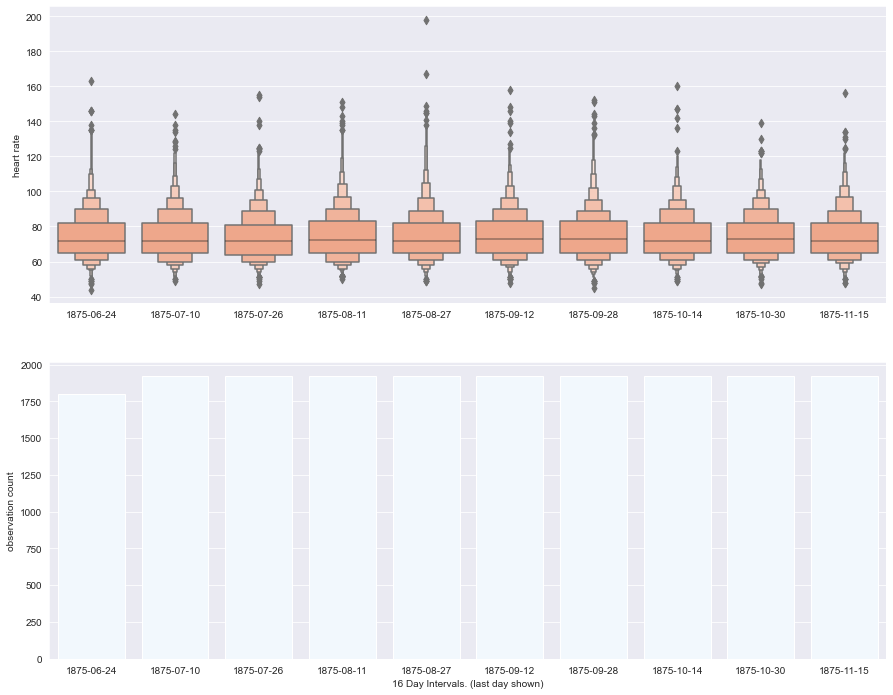

In [17]:
fig, axes = pyplot.subplots(nrows=2, ncols=1, figsize=(15, 12))

seaborn.boxenplot(data=ds,
                  x='bucket', y='heart rate',
                  ax=axes[0],
                  palette=['lightsalmon']
                  )

seaborn.countplot(data=ds,
                  x='bucket',
                  ax=axes[1],
                  palette=['aliceblue']
                  )

axes[0].set(xlabel=None)
axes[1].set(xlabel=f"{categories.bin_size} Day Intervals. (last day shown)", ylabel='observation count')

In [18]:
# Save the plots
fig.savefig(heart_rate_jpg)
fig.savefig(heart_rate_pdf)